In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [2]:
# Load the dataset
data = pd.read_csv("ObesityDataSet.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Exploratory Data Analysis (EDA)
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
# Encode categorical features
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['FAVC'] = le.fit_transform(data['FAVC'])
data['CAEC'] = le.fit_transform(data['CAEC'])
data['SMOKE'] = le.fit_transform(data['SMOKE'])
data['SCC'] = le.fit_transform(data['SCC'])
data['CALC'] = le.fit_transform(data['CALC'])
data['MTRANS'] = le.fit_transform(data['MTRANS'])
data['family_history_with_overweight'] = le.fit_transform(data['family_history_with_overweight'])

In [5]:
# BMI  Calculation
data['BMI'] = data['Weight'] / (data['Height']**2)
print(data)

      Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC

In [6]:
# Split the data into features and target variable
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print()

Model: Logistic Regression
Accuracy: 0.9030732860520094
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      1.00      0.94        56
      Normal_Weight       0.94      0.73      0.82        62
     Obesity_Type_I       0.97      0.92      0.95        78
    Obesity_Type_II       0.92      0.98      0.95        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.79      0.80      0.80        56
Overweight_Level_II       0.79      0.88      0.83        50

           accuracy                           0.90       423
          macro avg       0.90      0.90      0.90       423
       weighted avg       0.91      0.90      0.90       423

Confusion Matrix:
[[56  0  0  0  0  0  0]
 [ 7 45  0  0  0  7  3]
 [ 0  0 72  5  0  0  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  3  0  0  0 45  8]
 [ 0  0  1  0  0  5 44]]

Model: Decision Tree
Accuracy: 0.9692671394799054
Classific

In [7]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print()

Model: Logistic Regression
Accuracy: 0.9030732860520094
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      1.00      0.94        56
      Normal_Weight       0.94      0.73      0.82        62
     Obesity_Type_I       0.97      0.92      0.95        78
    Obesity_Type_II       0.92      0.98      0.95        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.79      0.80      0.80        56
Overweight_Level_II       0.79      0.88      0.83        50

           accuracy                           0.90       423
          macro avg       0.90      0.90      0.90       423
       weighted avg       0.91      0.90      0.90       423

Confusion Matrix:
[[56  0  0  0  0  0  0]
 [ 7 45  0  0  0  7  3]
 [ 0  0 72  5  0  0  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  3  0  0  0 45  8]
 [ 0  0  1  0  0  5 44]]

Model: Decision Tree
Accuracy: 0.9645390070921985
Classific

In [8]:
print(X_train.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'BMI'],
      dtype='object')


In [15]:
# Identify numerical and categorical columns
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
categorical_features = [col for col in X.columns if col not in numeric_features]

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combine preprocessing with model in a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [16]:
# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9810874704491725

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      1.00      0.99        56
      Normal_Weight       0.95      0.97      0.96        62
     Obesity_Type_I       1.00      1.00      1.00        78
    Obesity_Type_II       1.00      1.00      1.00        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.96      0.91      0.94        56
Overweight_Level_II       0.96      0.98      0.97        50

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423



In [17]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 0.960274724659115


In [18]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [19]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [20]:
confusion_matrix(y_test, y_pred)

array([[56,  0,  0,  0,  0,  0,  0],
       [ 1, 60,  0,  0,  0,  1,  0],
       [ 0,  0, 78,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  3,  0,  0,  0, 51,  2],
       [ 0,  0,  0,  0,  0,  1, 49]], dtype=int64)

In [21]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9952718676122931


In [22]:
# Create a logistic regression classifier. 
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [23]:
 # Train the model 
classifier.fit(X_train, y_train)

C:\Users\jesui\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=1)

In [24]:
# Get the training and testing data score.
print(f"Training Data Score: {classifier.score(X_train, y_train)}")

print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7612559241706162
Testing Data Score: 0.7541371158392435


In [25]:
# Make predictions. 
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,Insufficient_Weight,Insufficient_Weight
1,Obesity_Type_III,Obesity_Type_III
2,Insufficient_Weight,Insufficient_Weight
3,Normal_Weight,Insufficient_Weight
4,Overweight_Level_II,Normal_Weight
5,Insufficient_Weight,Insufficient_Weight
6,Obesity_Type_II,Obesity_Type_II
7,Overweight_Level_I,Overweight_Level_I
8,Obesity_Type_I,Obesity_Type_I
9,Insufficient_Weight,Insufficient_Weight


In [26]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.7541371158392435

In [27]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,Normal_Weight,24.386526
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,Normal_Weight,24.238227
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,Normal_Weight,23.765432
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,Overweight_Level_I,26.851852
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,Obesity_Type_III,44.901475
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,Obesity_Type_III,43.741923
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,Obesity_Type_III,43.543817
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,Obesity_Type_III,44.071535


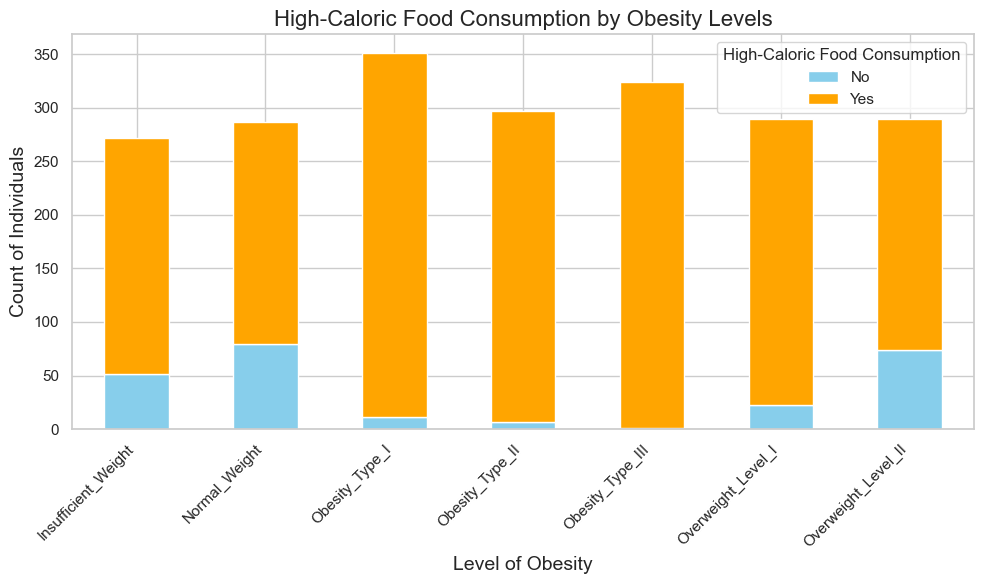

In [133]:
import matplotlib.pyplot as plt

# Group data by obesity level and food consumption, then get the count
count_data = data.groupby(['NObeyesdad', 'FAVC']).size().unstack(fill_value=0)

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])

plt.title('High-Caloric Food Consumption by Obesity Levels', fontsize=16)
plt.xlabel('Level of Obesity', fontsize=14)
plt.ylabel('Count of Individuals', fontsize=14)
plt.xticks(rotation=45, ha='right', va='top')
plt.legend(title='High-Caloric Food Consumption', labels=['No', 'Yes'], loc='upper right')
plt.tight_layout()
plt.savefig('Stacked_Bar_Obesity_and_Food_Consumption.png', format='png')
plt.show()

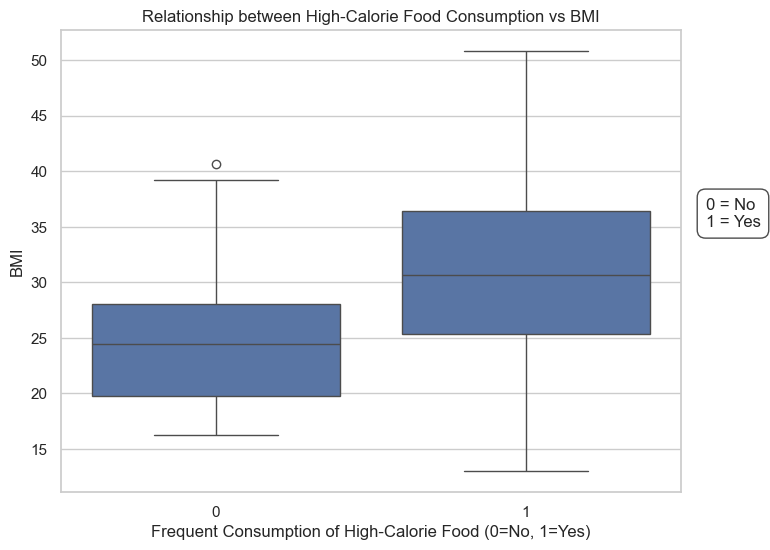

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='FAVC', y='BMI', data=data)
plt.title('Relationship between High-Calorie Food Consumption vs BMI')
plt.xlabel('Frequent Consumption of High-Calorie Food (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.text(x=1.58, y=35, s="0 = No\n1 = Yes", 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle="round,pad=0.5"))
plt.savefig('Relationship between High-Calorie Food Consumption vs BMI.png', format='png', bbox_inches='tight')
plt.show()

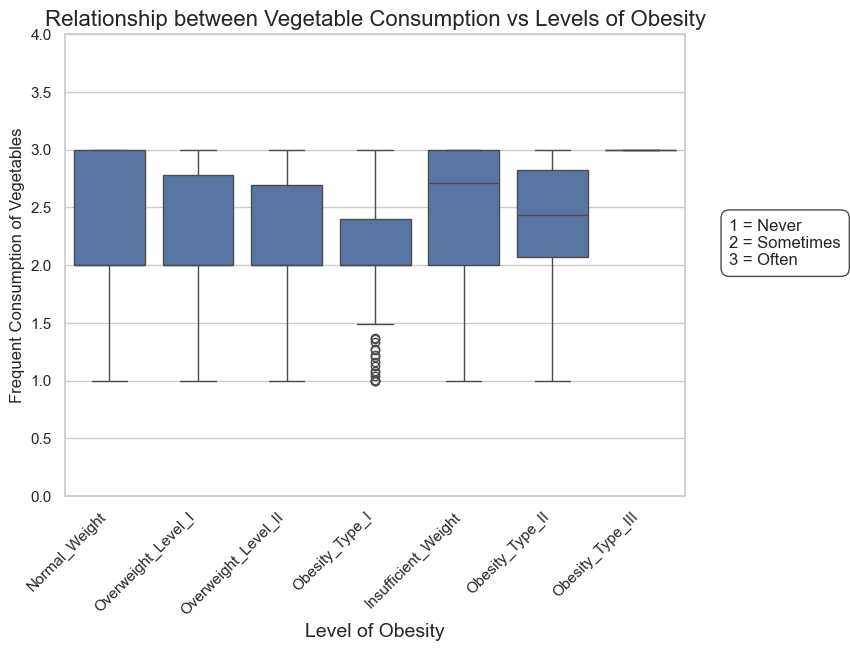

In [121]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='NObeyesdad', y='FCVC', data=data)
plt.title('Relationship between Vegetable Consumption vs Levels of Obesity', fontsize=16)
plt.xlabel('Level of Obesity', fontsize=14)
plt.ylabel('Frequent Consumption of Vegetables', fontsize=12)
plt.ylim(0, 4)
plt.text(x=7, y=2, s="1 = Never\n2 = Sometimes\n3 = Often", 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle="round,pad=0.5"))
plt.xticks(rotation=45, ha='right', va='top')
plt.savefig('Relationship between Vegetable Consumption vs Levels of Obesity.png', format='png', bbox_inches='tight')
plt.show()

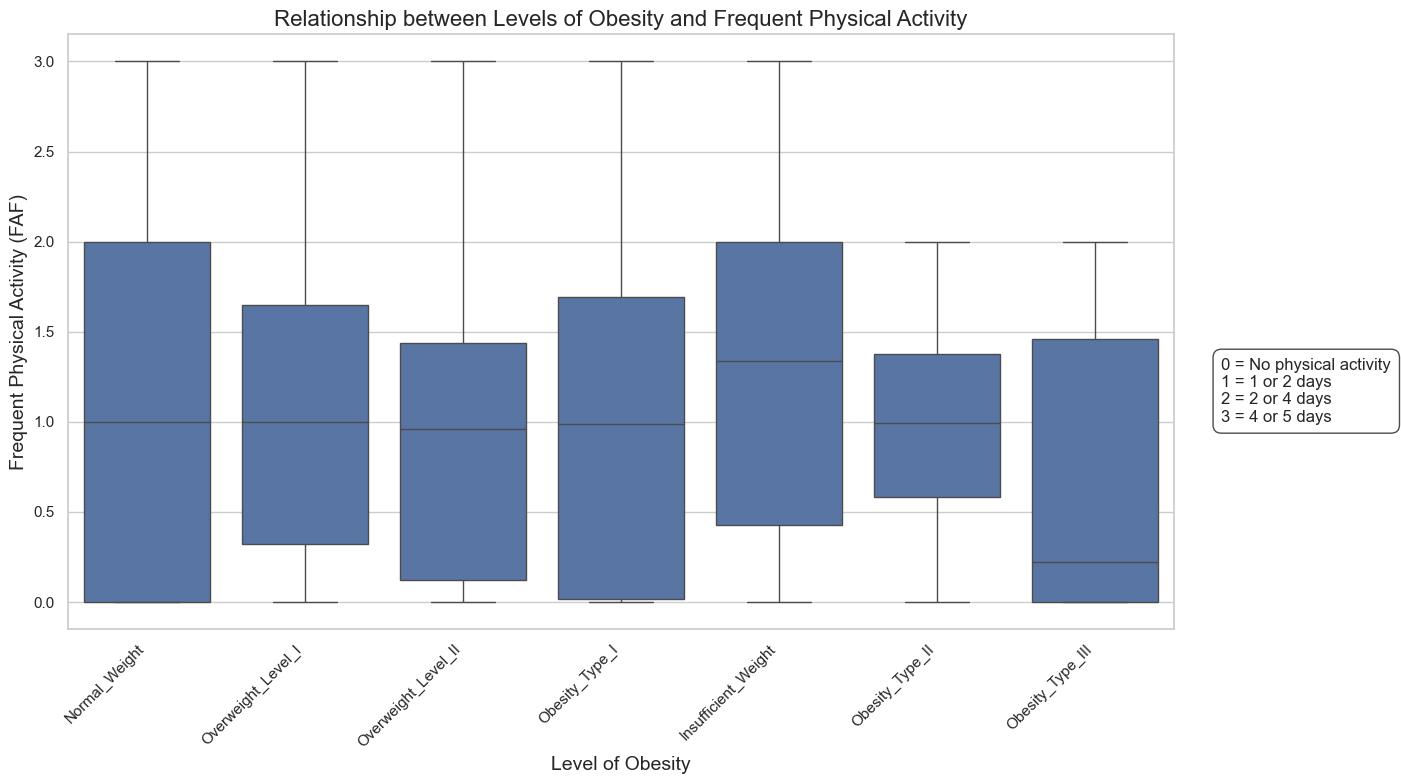

In [110]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='NObeyesdad', y='FAF', data=data)

plt.title('Relationship between Levels of Obesity and Frequent Physical Activity', fontsize=16)
plt.xlabel('Level of Obesity', fontsize=14)
plt.ylabel('Frequent Physical Activity (FAF)', fontsize=14)
plt.xticks(rotation=45, ha='right', va='top')
plt.tight_layout()
plt.text(x=6.8, y=1, s="0 = No physical activity\n1 = 1 or 2 days\n2 = 2 or 4 days \n3 = 4 or 5 days", 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle="round,pad=0.5"))
plt.savefig('Relationship between Levels of Obesity and Frequent Physical Activity.png', format='png', bbox_inches='tight')
plt.show()

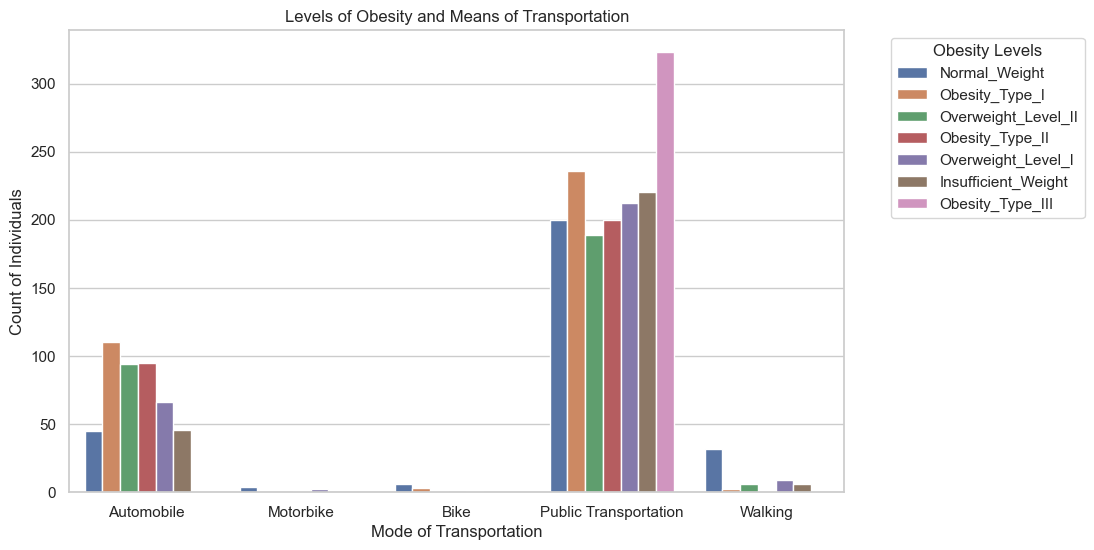

In [131]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MTRANS', hue='NObeyesdad', data=data)

plt.title('Levels of Obesity and Means of Transportation')
plt.xlabel('Mode of Transportation')
plt.ylabel('Count of Individuals')
plt.xticks([0, 1, 2, 3, 4], ['Automobile', 'Motorbike', 'Bike', 'Public Transportation', 'Walking'])
plt.legend(title='Obesity Levels', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('Obesity Levels and Means of Transportation.png', format='png', bbox_inches='tight')
plt.show()

C:\Users\jesui\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jesui\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jesui\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jesui\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jesui\anaconda3\envs\dev\lib\site-packages\seaborn\categoric

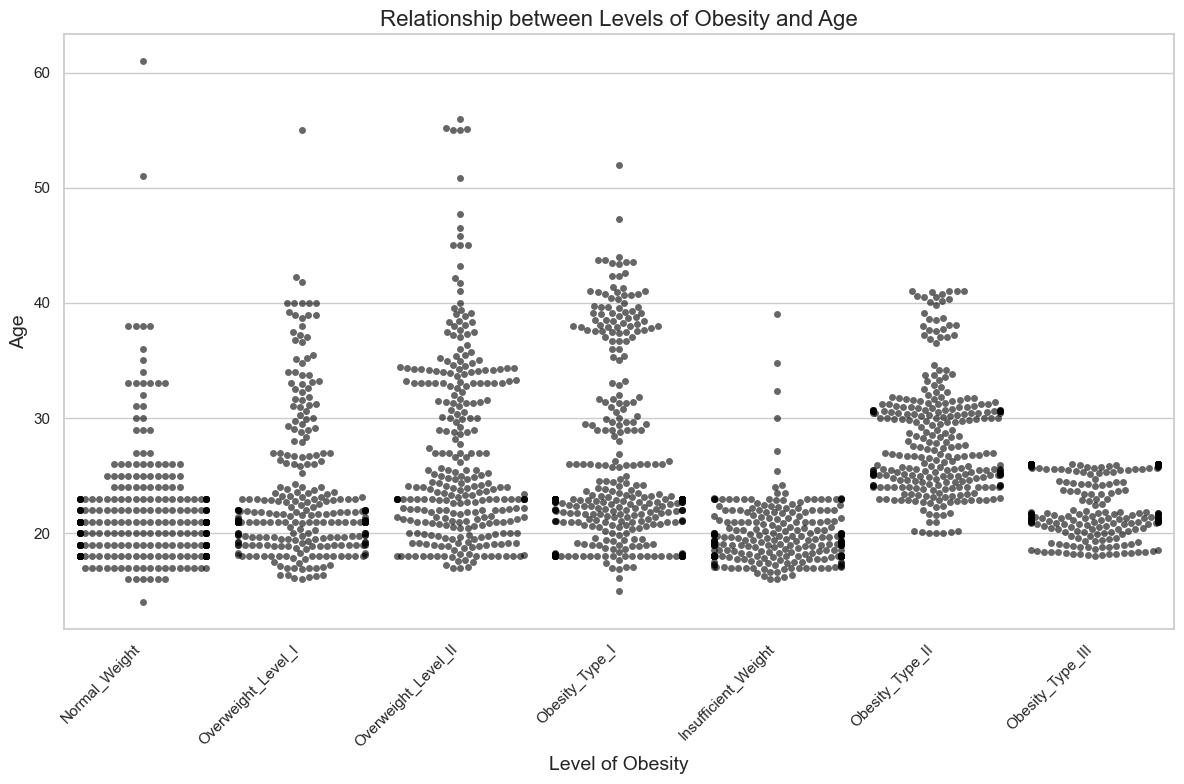

In [130]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='NObeyesdad', y='Age', data=data, color='black', alpha=0.6)

plt.title('Relationship between Levels of Obesity and Age', fontsize=16)
plt.xlabel('Level of Obesity', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(rotation=45, ha='right', va='top')
plt.tight_layout()
plt.savefig('Relationship between Levels of Obesity and Age_Swarm.png', format='png')
plt.show()

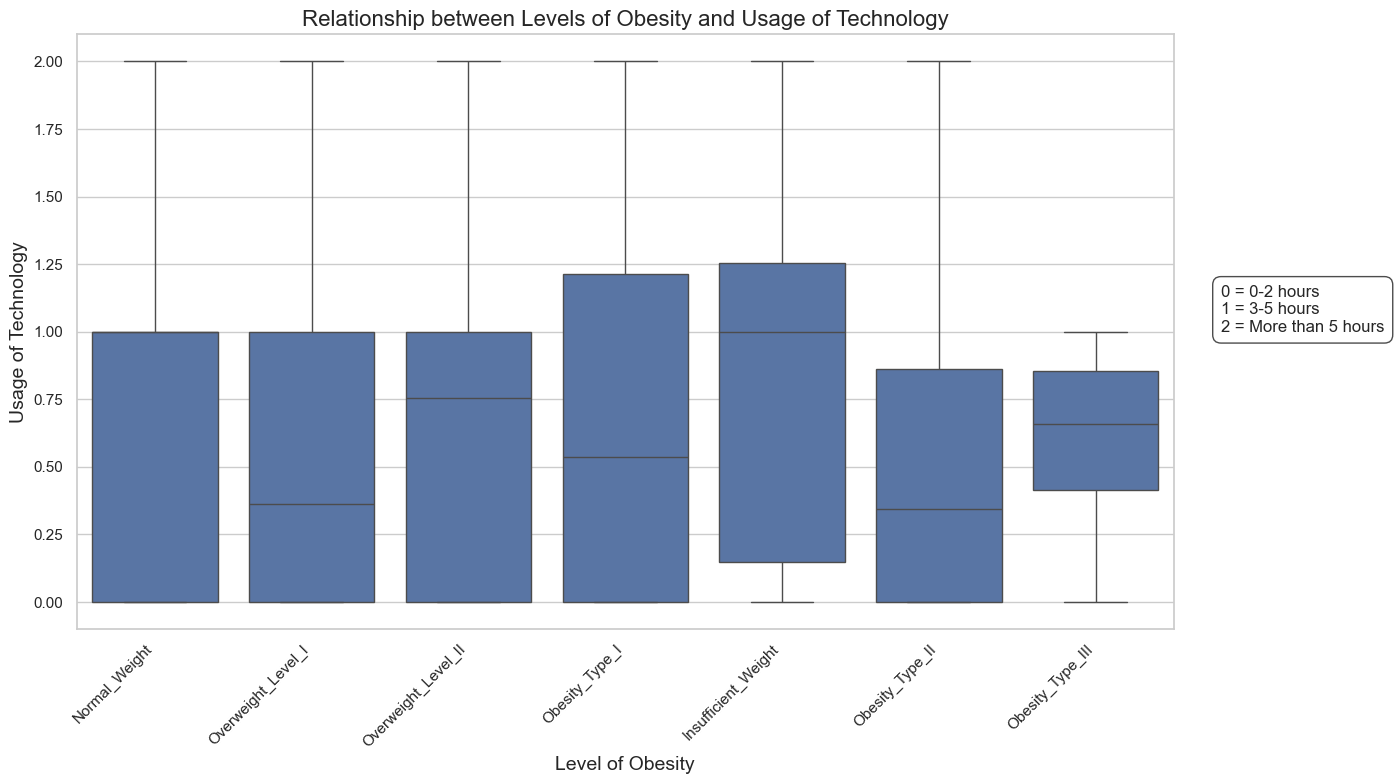

In [109]:
plt.figure(figsize=(12, 8)) 
sns.boxplot(x='NObeyesdad', y='TUE', data=data)

plt.title('Relationship between Levels of Obesity and Usage of Technology', fontsize=16)
plt.xlabel('Level of Obesity', fontsize=14)
plt.ylabel('Usage of Technology', fontsize=14)
plt.xticks(rotation=45, ha='right', va='top')
plt.tight_layout()
plt.text(x=6.8, y=1, s="0 = 0-2 hours\n1 = 3-5 hours\n2 = More than 5 hours", 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle="round,pad=0.5"))
plt.savefig('Relationship between Levels of Obesity and Usage of Technology.png', format='png', bbox_inches='tight')
plt.show()

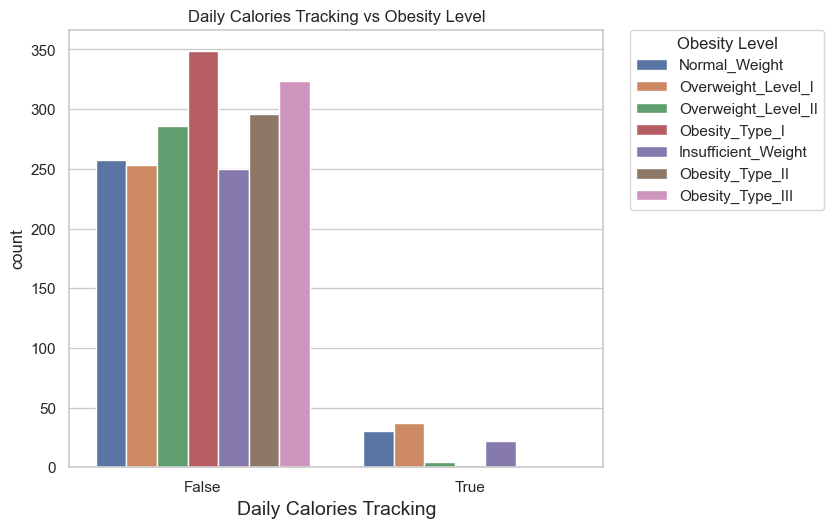

In [157]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='SCC', hue='NObeyesdad', data=data)
plt.title('Daily Calories Tracking vs Obesity Level')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.xlabel('Daily Calories Tracking', fontsize=14)
plt.legend(title='Obesity Level', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.savefig('Daily Calories Tracking vs Obesity Level.png', format='png', bbox_inches='tight')

plt.tight_layout()
plt.show()

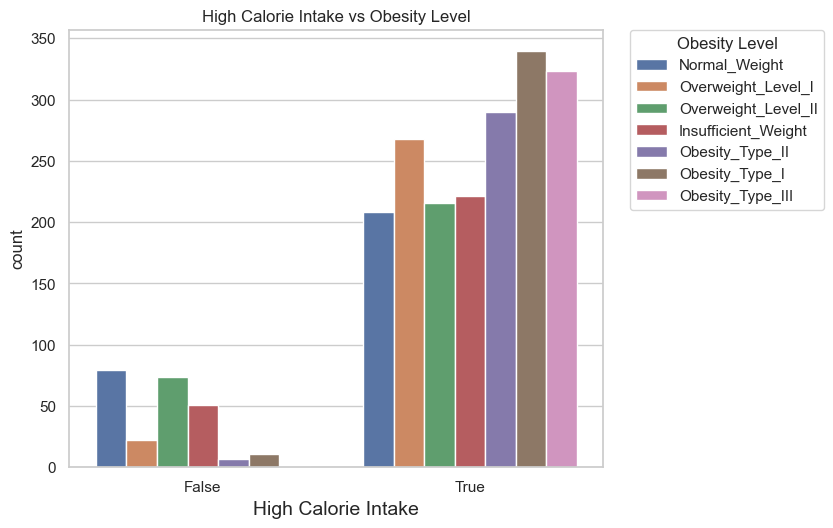

In [156]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 2)
sns.countplot(x='FAVC', hue='NObeyesdad', data=data)
plt.title('High Calorie Intake vs Obesity Level')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.xlabel('High Calorie Intake', fontsize=14)
plt.legend(title='Obesity Level', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.savefig('High Calorie Intake vs Obesity Level.png', format='png', bbox_inches='tight')

plt.tight_layout()
plt.show()

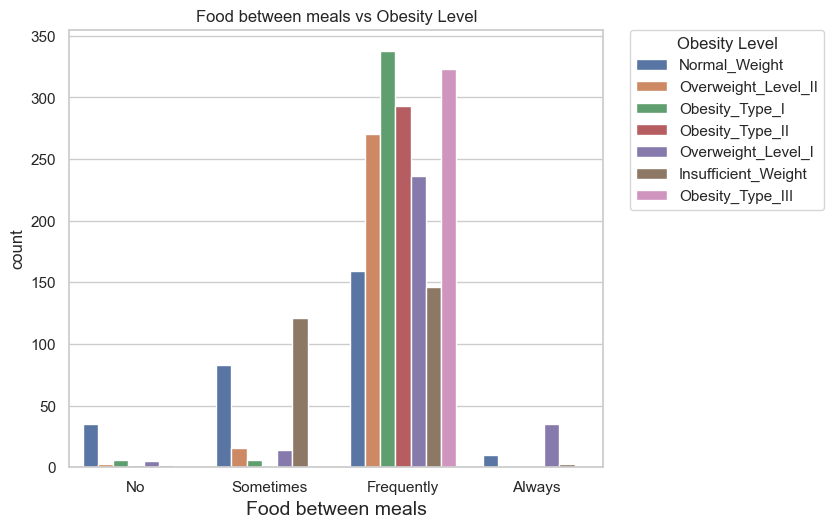

In [154]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 3)
sns.countplot(x='CAEC', hue='NObeyesdad', data=data)
plt.title('Food between meals vs Obesity Level')
plt.xticks(ticks=[0, 1, 2, 3], labels=['No', 'Sometimes', 'Frequently', 'Always'])
plt.xlabel('Food between meals', fontsize=14)
plt.legend(title='Obesity Level', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.savefig('Food between meals vs Obesity Level.png', format='png', bbox_inches='tight')

plt.tight_layout()
plt.show()

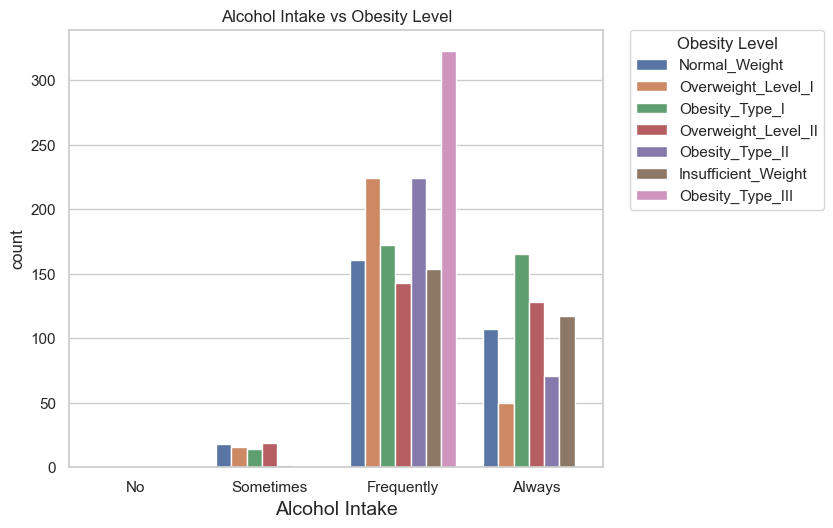

In [155]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 4)
sns.countplot(x='CALC', hue='NObeyesdad', data=data)
plt.title('Alcohol Intake vs Obesity Level')
plt.xticks(ticks=[0, 1, 2, 3, ], labels=['No', 'Sometimes', 'Frequently', 'Always'])
plt.xlabel('Alcohol Intake', fontsize=14)
plt.legend(title='Obesity Level', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.savefig('Alcohol Intake vs Obesity Level.png', format='png', bbox_inches='tight')

plt.tight_layout()
plt.show()